# EDA for AIS Data  
**Data from March 2019**

**Notes on the data**  
1. According to MarineCadastre, which makes the data publically available, all points of a track are made 1 minute apart  
2. There is a useful FAQ for the data:  chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://coast.noaa.gov/data/marinecadastre/ais/faq.pdf  
3. Before 2015, the data was separated into voyages. This is no longer done, but the tool TrackBuilder can supposedly be used to construct the voyages. 
4. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import random


In [2]:
dtypes = {'MMSI': int,
         'BaseDateTime': str,
         'LAT': float,
         'LON': float,
         'SOG': float,
         'COG': float,
         'Heading': float,
         'VesselName': str,
         'IMO': str,
         'CallSign': str,
         'VesselType': int,
         'Status': int,
         'Length': int, 
         'Width': int,
         'Draft': float,
         'Cargo': int,
         'TranscieverClass': str}

In [3]:
#data = pd.read_csv("../data/AIS.csv", dtype=dtypes)
data = pd.read_csv("../data/AIS.csv")

/tmp/ipykernel_82/512505876.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/AIS.csv")


In [4]:
data.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,368064650,2020-01-01T00:00:00,33.72365,-118.27967,0.0,360.0,511.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,A
1,563033800,2020-01-01T00:00:00,34.31438,-127.24920,18.8,101.6,97.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
2,3669999,2020-01-01T00:00:01,33.72340,-118.28068,0.1,258.5,511.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
3,232007052,2020-01-01T00:00:02,33.08242,-119.89191,0.4,136.9,324.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,A
4,219033000,2020-01-01T00:00:02,35.16659,-127.96663,20.5,106.0,103.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A


In [5]:
data['BaseDateTime'] = pd.to_datetime(data['BaseDateTime'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
data.loc[data['MMSI'] == 563033800]

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
1,563033800,2020-01-01 00:00:00,34.31438,-127.24920,18.8,101.6,97.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
43,563033800,2020-01-01 00:01:06,34.31346,-127.24282,18.4,98.6,97.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
90,563033800,2020-01-01 00:02:11,34.31255,-127.23634,18.5,99.4,97.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
141,563033800,2020-01-01 00:03:18,34.31155,-127.22947,18.6,98.7,97.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
179,563033800,2020-01-01 00:04:23,34.31051,-127.22274,18.4,99.9,97.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417503,563033800,2020-01-08 07:07:19,33.63988,-125.02861,15.8,267.1,270.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
417905,563033800,2020-01-08 07:18:55,33.63774,-125.08907,15.4,267.6,270.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
417942,563033800,2020-01-08 07:20:01,33.63752,-125.09467,15.6,266.9,270.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
418098,563033800,2020-01-08 07:24:42,33.63667,-125.11904,15.6,267.2,270.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A


In [7]:
data.shape

(5666064, 17)

In [8]:
data.isnull().sum()

MMSI                      0
BaseDateTime              0
LAT                       0
LON                       0
SOG                       0
COG                       0
Heading                   0
VesselName           464446
IMO                 4198405
CallSign            1998806
VesselType           532528
Status              2711580
Length              1115452
Width               1909734
Draft               4555573
Cargo               4643826
TransceiverClass          0
dtype: int64

**If all of the identifiers for the data are missing in such large numbers then how will I construct tracks?**

In [9]:
data.dtypes

MMSI                         int64
BaseDateTime        datetime64[ns]
LAT                        float64
LON                        float64
SOG                        float64
COG                        float64
Heading                    float64
VesselName                  object
IMO                         object
CallSign                    object
VesselType                 float64
Status                     float64
Length                     float64
Width                      float64
Draft                      float64
Cargo                      float64
TransceiverClass            object
dtype: object

In [10]:
track_data = data[["MMSI", "BaseDateTime", "LAT", "LON", "SOG", "COG", "Heading"]]

In [11]:
ship_data = track_data.groupby(["MMSI"]).count()

In [12]:
ship_data.shape

(1900, 6)

In [13]:
ship_data.head(10)

,BaseDateTime,LAT,LON,SOG,COG,Heading
MMSI,,,,,,
368926,42,42,42,42,42,42
888888,62,62,62,62,62,62
1193046,4748,4748,4748,4748,4748,4748
3669999,14259,14259,14259,14259,14259,14259
53869592,1,1,1,1,1,1
101010101,77,77,77,77,77,77
122292919,8177,8177,8177,8177,8177,8177
201216315,208,208,208,208,208,208
203877400,1410,1410,1410,1410,1410,1410


**Of the data that is missing VesselType, is the VesselType missing for all instances of that particular ship?**

## TODO for this week
* Explore the missingness of the data  
  1. Is there a missing temporal aspect of the data? If the data is sampled once per minute, we should expect to see 60 samples for a single trajectory over an hour period. You'll need to convert the time into timestamps and then pick out specific tracks.
  2. Is there spatial areas where the data is missing? Is data missing for many trajectories in a specific location? For instance, what happens when a ship is in port? Do they just turn their transponder off?  
* Explore data which may be highly correlated compared to normal  
  1. You can sample the data where a yellow line ends and compare it to where the yellow line begins.  
  2. Randomly sample groups of ships and calculate their correlation. Plot the distribution of correlations for each group to compare.

In [14]:
def get_single_ship_df(mmsi, data=data):
    return data[data['MMSI']==mmsi].sort_values(by='BaseDateTime')

In [15]:
def get_time_delta(time):
    return np.diff(time).astype('timedelta64[s]')

In [16]:
def graph_ship_time_delta(time_delta):
    f, ax = plt.subplots(figsize=(10, 6))
    g = sns.barplot(x=list(range(len(time_delta))), y=time_delta.astype(int))
    ax.set_title('Time Delta for Ship (seconds)')
    g.set(xticklabels=[])  
    g.set(xlabel='Delta Over Time')
    g.set(ylabel='Delta (seconds)')
    g.tick_params(bottom=False)  # remove the ticks
    
    tick_spacing = 120
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.show()

**Examining Time Delta for Ship 1193046**

In [98]:
ship_1 = get_single_ship_df(1193046)
ship_1.head(5)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
4163258,1193046,2020-01-01 00:00:08,32.68644,-117.13303,0.0,0.0,511.0,NAUTICAST,IMO3031741,D11233,50.0,7.0,220.0,43.0,-0.8,50.0,A
4163266,1193046,2020-01-01 00:02:18,32.68644,-117.13303,0.0,0.0,511.0,NAUTICAST,IMO3031741,D11233,50.0,7.0,220.0,43.0,-0.8,50.0,A
4163275,1193046,2020-01-01 00:04:27,32.68644,-117.13303,0.0,0.0,511.0,NAUTICAST,IMO3031741,D11233,50.0,7.0,220.0,43.0,-0.8,50.0,A
4163280,1193046,2020-01-01 00:05:37,32.68644,-117.13303,0.0,0.0,511.0,NAUTICAST,IMO3031741,D11233,50.0,7.0,220.0,43.0,-0.8,50.0,A
4163286,1193046,2020-01-01 00:06:58,32.68644,-117.13303,0.0,0.0,511.0,NAUTICAST,IMO3031741,D11233,50.0,7.0,220.0,43.0,-0.8,50.0,A


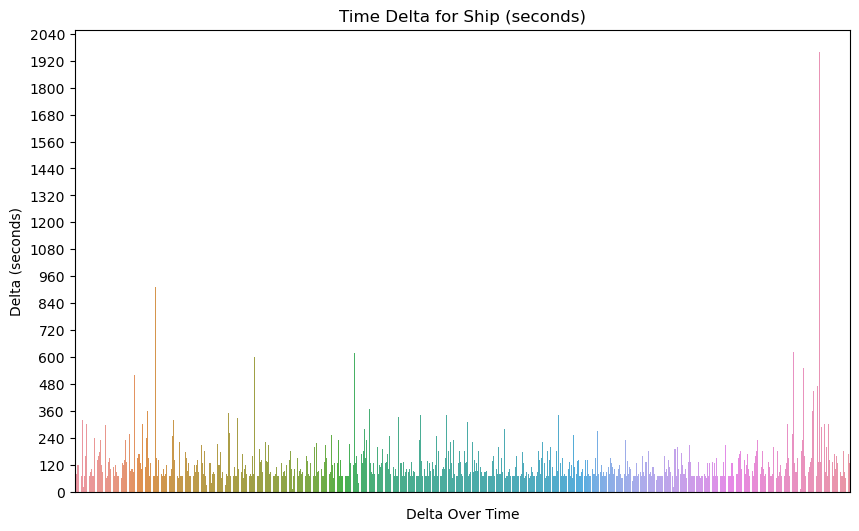

In [99]:
graph_ship_time_delta(get_time_delta(ship_1['BaseDateTime']))

**Examining Time Delta for Ship 3669999**

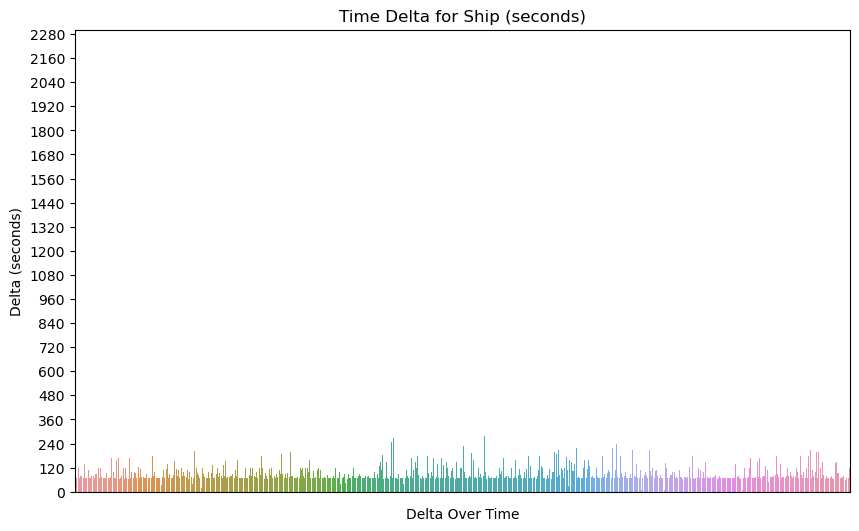

In [100]:
ship_2 = get_single_ship_df(3669999)
graph_ship_time_delta(get_time_delta(ship_2['BaseDateTime']))

### Delta Analysis  
It would be useful to examine what percentage of time deltas lie outside of a bin close to 60 seconds for each type of ship. This way we can see if most tracks actually have measurements in increments of 60 seconds. Some types of ships may have more outliers which could indicate those ships have more tracks. 

In [101]:
def get_delta_normal(time_delta, time_bin=(40,80)):
    # Returns the proportion of time deltas that lie outside of the defined 
    # time bin
    normal = time_delta[(time_delta > 40) & (time_delta < 80)]
    if len(time_delta)==0:
        return 0
    return len(normal)/len(time_delta)

In [102]:
get_delta_normal(get_time_delta(ship_2['BaseDateTime']).astype(int))

0.5406789170991724

In [218]:
# Get outlier proportion for all ships
normal = []
for mmsi in ship_data.index:
    ship = get_single_ship_df(mmsi)
    normal.append(get_delta_normal(get_time_delta(ship['BaseDateTime']).astype(int), time_bin=(20, 480)))

In [219]:
ship_data["TimeDeltaNormal"] = normal

In [220]:
ship_data

,BaseDateTime,LAT,LON,SOG,COG,Heading,TimeDeltaNormal
MMSI,,,,,,,
368926,42,42,42,42,42,42,0.707317
888888,62,62,62,62,62,62,0.475410
1193046,4748,4748,4748,4748,4748,4748,0.333052
3669999,14259,14259,14259,14259,14259,14259,0.540679
53869592,1,1,1,1,1,1,0.000000
...,...,...,...,...,...,...,...
972697568,6,6,6,6,6,6,0.400000
983094842,108,108,108,108,108,108,0.000000
983094845,2,2,2,2,2,2,1.000000


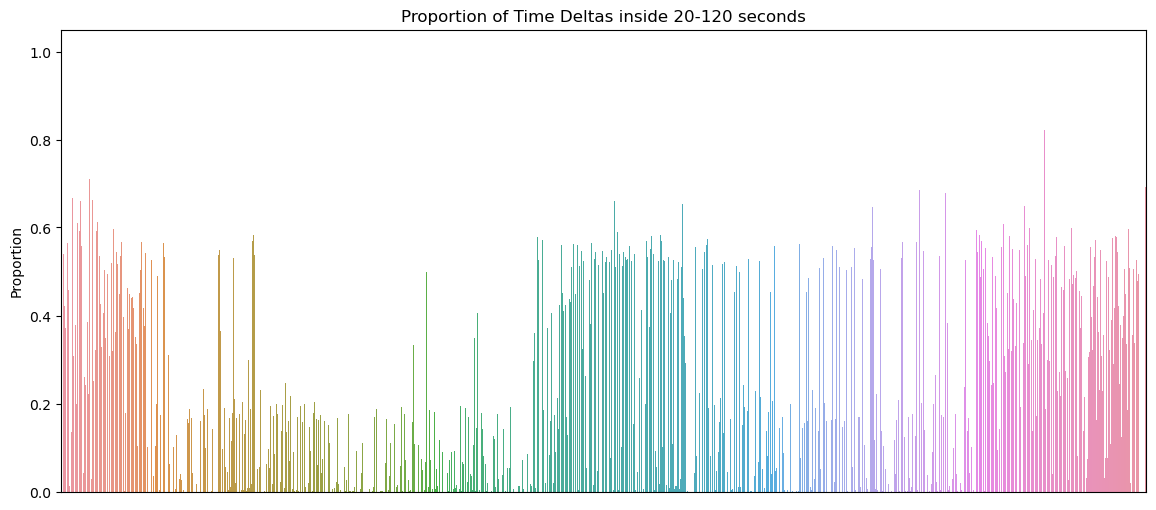

In [221]:
f, ax = plt.subplots(figsize=(14, 6))
g = sns.barplot(x=list(range(ship_data.shape[0])), y=ship_data.TimeDeltaNormal)
ax.set_title('Proportion of Time Deltas inside 20-120 seconds')
g.set(xticklabels=[])  
#g.set(xlabel='Proportion')
g.set(ylabel='Proportion')
g.tick_params(bottom=False)  # remove the ticks

#tick_spacing = 120
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

**Let's examine time deltas across all ships**

In [222]:
deltas = []
for mmsi in ship_data.index:
    ship = get_single_ship_df(mmsi)
    deltas = deltas + list(get_time_delta(ship['BaseDateTime']).astype(int))

In [ ]:
f, ax = plt.subplots(figsize=(14, 6))
g = sns.barplot(x=list(range(len(deltas[1:10000]))), y=deltas[1:10000])
ax.set_title('Size of time deltas across all ships')
g.set(xticklabels=[])  
#g.set(xlabel='Proportion')
g.set(ylabel='Time Delta (seconds)')
g.tick_params(bottom=False)  # remove the ticks

#tick_spacing = 120
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

### Comparison of Correlations  
We want to know whether there is a noticeable difference in the correlation of random groups between an area where we don't expect to see a lot of coordination and an area where we do. This should be relatively straightforward.  
1. Get the data from two locations (1) where there is a 'normal' amount of coordination, and (2) where we believe there is a high amount of coordination  
2. Write a function to draw random groups of 5 out of these two datasets  
3. Calculate the correlation of tracks for both groups  
4. Repeat this process many times and compare the average correlation for groups of ships in (1) and (2)


In [17]:
full_correlated_data = pd.read_csv("../data/AIS_correlated.csv")
full_uncorrelated_data = pd.read_csv("../data/AIS_uncorrelated.csv")

In [18]:
cols = ["MMSI", "BaseDateTime", "LAT", "LON", "SOG", "COG", "Heading"]
correlated_data = full_correlated_data[cols]
uncorrelated_data = full_uncorrelated_data[cols]

In [19]:
def get_correlation_col(data, col):
    n = 2
    mmsi_samples = random.sample(list(data.MMSI.unique()), n)

    sample1 = get_single_ship_df(mmsi_samples[0], data=data).sort_values(by='BaseDateTime')
    sample2 = get_single_ship_df(mmsi_samples[1], data=data).sort_values(by='BaseDateTime')
    k = 0
    if sample1.shape[0] < sample2.shape[0]:
        k = sample1.shape[0]
    else:
        k = sample2.shape[0]

    return np.corrcoef(sample1[col][0:k].values, sample2[col][0:k].values)[0][1]

In [20]:
def plot_correlation(data1, data2, col, labels, title):
    # Get 1000 samples of correlation between two tracks for the correlated data
    correlations1 = []
    correlations2 = []
    for i in range(1000):
        correlations1.append(get_correlation_col(data1, 'LAT'))
        correlations2.append(get_correlation_col(data2, 'LAT'))

    g = sns.displot(x=correlations1+correlations2, hue=(([0]*1000) + ([1]*1000)), 
                    kind='kde', bw_adjust=.25, legend=False)
    plt.legend(labels)
    plt.title(title)
    plt.show()

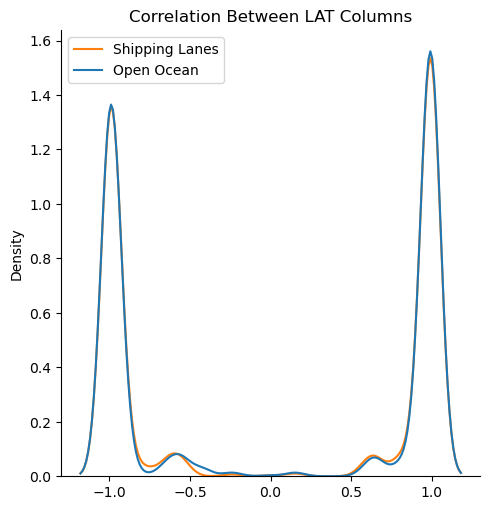

In [21]:
# Get 1000 samples of correlation between two tracks for the correlated data
plot_correlation(correlated_data, uncorrelated_data, 'LAT', 
                 labels=['Shipping Lanes', 'Open Ocean'], title="Correlation Between LAT Columns")

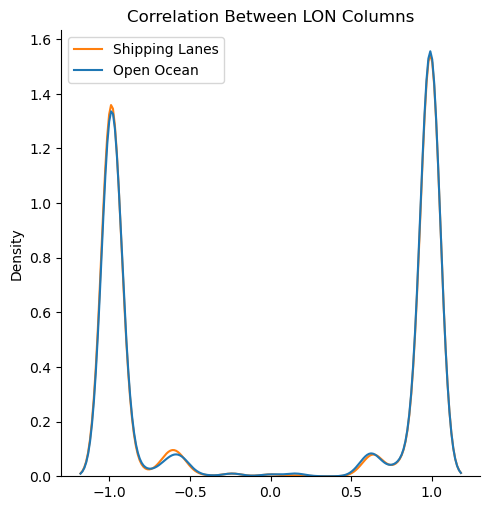

In [22]:
# Get 1000 samples of correlation between two tracks for the correlated data
plot_correlation(correlated_data, uncorrelated_data, 'LON', 
                 labels=['Shipping Lanes', 'Open Ocean'], title="Correlation Between LON Columns")

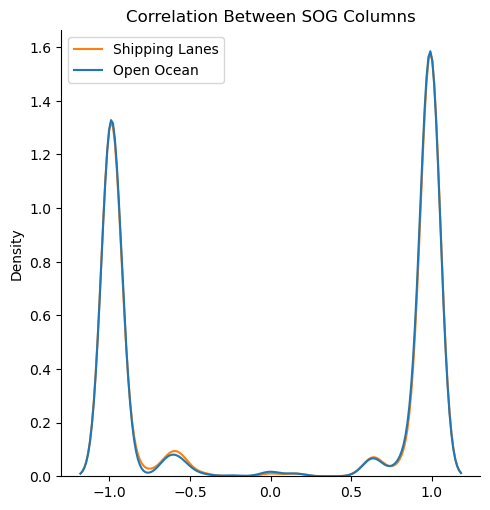

In [23]:
plot_correlation(correlated_data, uncorrelated_data, 'SOG', 
                 labels=['Shipping Lanes', 'Open Ocean'], title="Correlation Between SOG Columns")

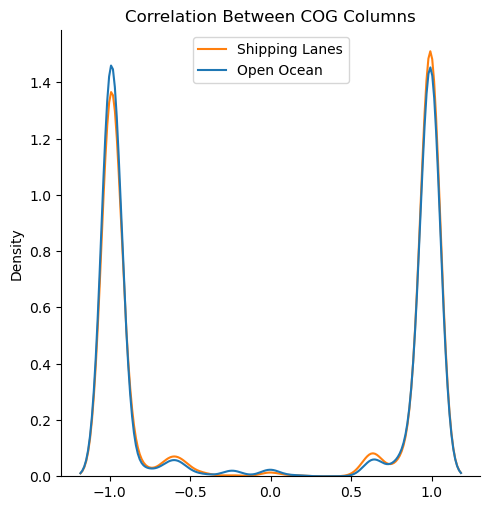

In [24]:
plot_correlation(correlated_data, uncorrelated_data, 'COG', 
                 labels=['Shipping Lanes', 'Open Ocean'], title="Correlation Between COG Columns")

### Can we find a signal by looking only at cargo ships, rather than all ships?

In [25]:
cols = ["MMSI", "BaseDateTime", "LAT", "LON", "SOG", "COG", "Heading", 'VesselType']
correlated_data = full_correlated_data[cols]
uncorrelated_data = full_uncorrelated_data[cols]

In [26]:
cargo_corr = correlated_data[(correlated_data.VesselType >= 70) & (correlated_data.VesselType < 90)]
cargo_uncorr = uncorrelated_data[(uncorrelated_data.VesselType >= 70) & (uncorrelated_data.VesselType < 90)]

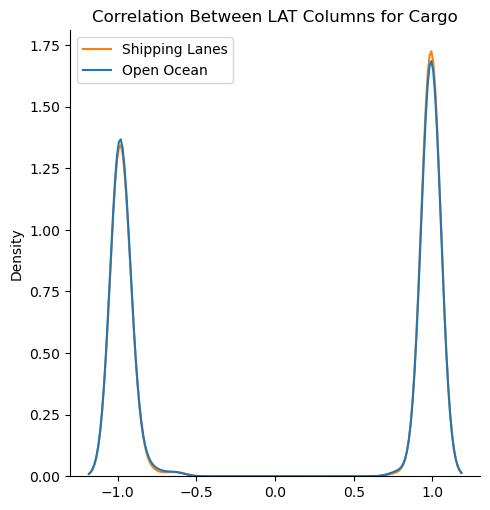

In [27]:
plot_correlation(cargo_corr, cargo_uncorr, 'LAT', 
                 labels=['Shipping Lanes', 'Open Ocean'], title="Correlation Between LAT Columns for Cargo")

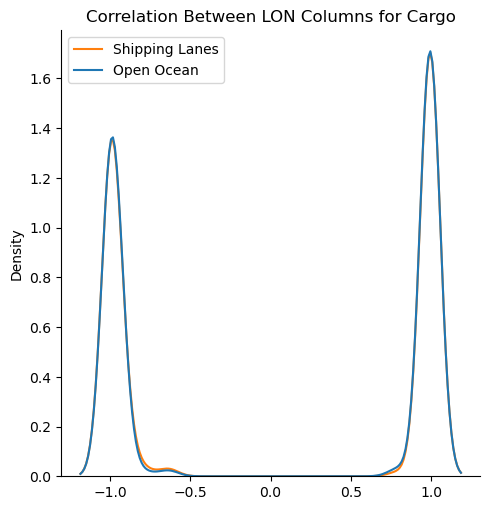

In [28]:
plot_correlation(cargo_corr, cargo_uncorr, 'LON', 
                 labels=['Shipping Lanes', 'Open Ocean'], title="Correlation Between LON Columns for Cargo")

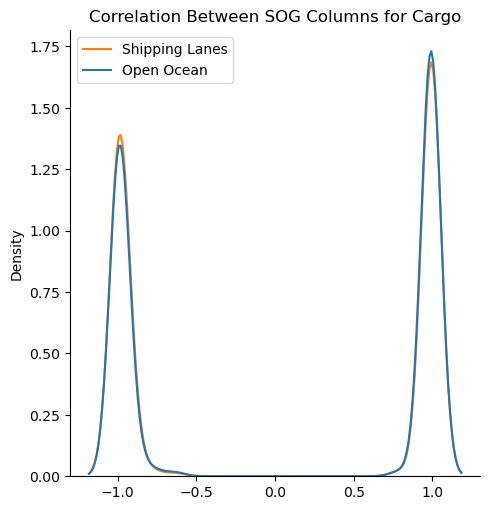

In [29]:
plot_correlation(cargo_corr, cargo_uncorr, 'SOG', 
                 labels=['Shipping Lanes', 'Open Ocean'], title="Correlation Between SOG Columns for Cargo")

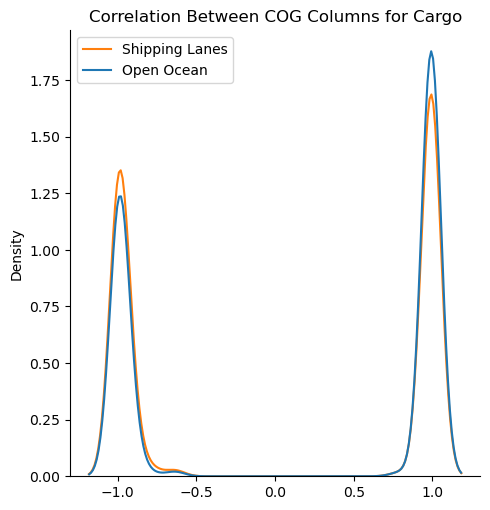

In [30]:
plot_correlation(cargo_corr, cargo_uncorr, 'COG', 
                 labels=['Shipping Lanes', 'Open Ocean'], title="Correlation Between COG Columns for Cargo")

In [31]:
# Fill in any missing vessel types that were found in other rows
#dat = correlated_data[['MMSI', 'VesselType']]
#corr_ship_types = dict(zip(dat.MMSI, dat.VesselType))
#correlated_data.VesselType.fillna(corr_ship_types).isna().sum()

In [32]:
uncorrelated_data.VesselType.isna().sum()

419

In [33]:
# Fill in any missing vessel types that were found in other rows
dat = uncorrelated_data[['MMSI', 'VesselType']]
dat = dat.dropna()
uncorr_ship_types = dict(zip(dat.MMSI, dat.VesselType))
uncorrelated_data.VesselType.fillna(corr_ship_types).isna().sum()

NameError: name 'corr_ship_types' is not defined

In [34]:
full_correlated_data.shape

(1555, 17)

In [35]:
full_uncorrelated_data.shape

(1555, 17)

In [36]:
(full_correlated_data == full_uncorrelated_data).sum()

MMSI                1555
BaseDateTime        1555
LAT                 1555
LON                 1555
SOG                 1555
COG                 1555
Heading             1555
VesselName          1136
IMO                 1136
CallSign            1136
VesselType          1136
Status              1555
Length              1136
Width               1136
Draft               1136
Cargo                474
TransceiverClass    1555
dtype: int64

It looks like most of the data is exactly the same between these two datasets. This might be an issue. Next, we will try to sample data from a larger portion of the port area and from an area farther out in the ocean. 

## Data from LA port vs from open oean near LA

In [37]:
full_la_data = pd.read_csv("../data/AIS_la_port.csv", low_memory=False)
full_ocean_data = pd.read_csv("../data/AIS_open_ocean.csv")

In [38]:
cols = ["MMSI", "BaseDateTime", "LAT", "LON", "SOG", "COG", "Heading", 'VesselType']
la_data = full_la_data[cols]
ocean_data = full_ocean_data[cols]

In [39]:
# Get only cargo ships
cargo_la = la_data.copy()[(la_data.VesselType >= 70) & (la_data.VesselType < 90)]
cargo_ocean = ocean_data.copy()[(ocean_data.VesselType >= 70) & (ocean_data.VesselType < 90)]

In [40]:
# Drop vessel type column
cargo_la.drop(columns=['VesselType'], axis=1, inplace=True)
cargo_ocean.drop(columns=['VesselType'], axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


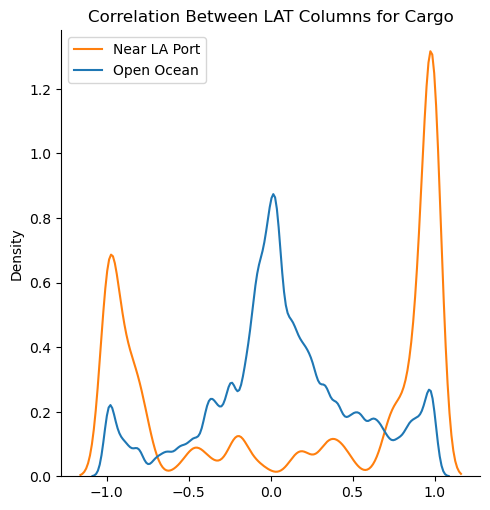

In [41]:
plot_correlation(cargo_la, cargo_ocean, 'LAT', 
                 labels=['Near LA Port', 'Open Ocean'], title="Correlation Between LAT Columns for Cargo")

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


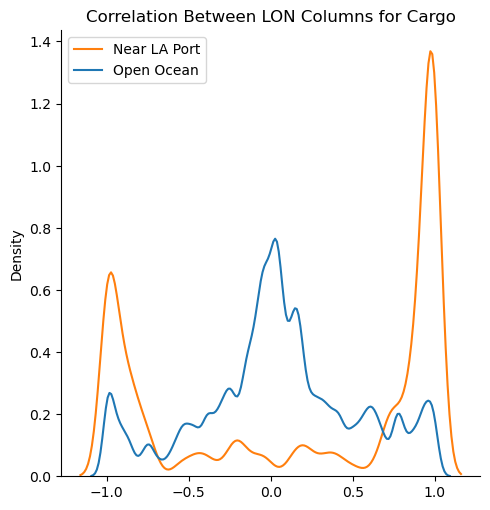

In [42]:
plot_correlation(cargo_la, cargo_ocean, 'LON', 
                 labels=['Near LA Port', 'Open Ocean'], title="Correlation Between LON Columns for Cargo")

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


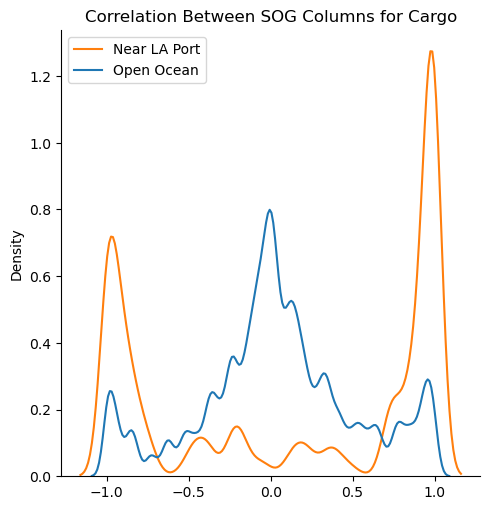

In [43]:
plot_correlation(cargo_la, cargo_ocean, 'SOG', 
                 labels=['Near LA Port', 'Open Ocean'], title="Correlation Between SOG Columns for Cargo")

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


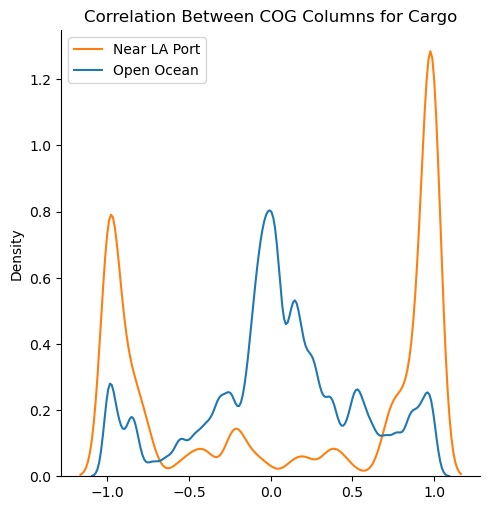

In [44]:
plot_correlation(cargo_la, cargo_ocean, 'COG', 
                 labels=['Near LA Port', 'Open Ocean'], title="Correlation Between COG Columns for Cargo")

## Results:  
We see very clearly that there is a difference in correlation between cargo and tanker ships near the port of LA and vessels on the open ocean. This is the signal we are looking for. Does the same separation happen for all ships or just cargo/tanker?

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


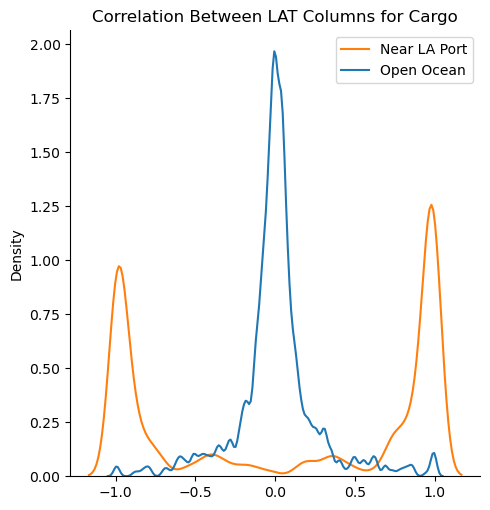

In [45]:
plot_correlation(la_data, ocean_data, 'LAT', 
                 labels=['Near LA Port', 'Open Ocean'], title="Correlation Between LAT Columns for Cargo")

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


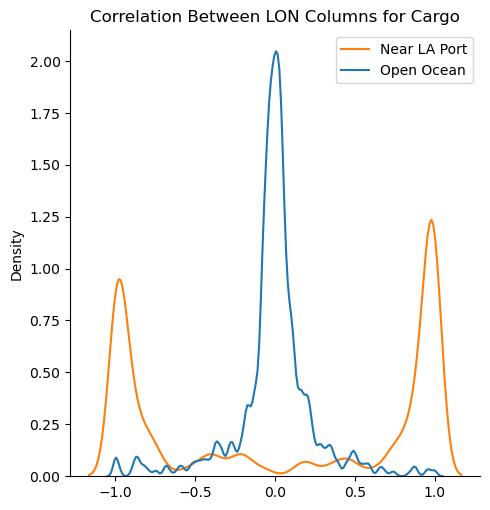

In [46]:
plot_correlation(la_data, ocean_data, 'LON', 
                 labels=['Near LA Port', 'Open Ocean'], title="Correlation Between LON Columns for Cargo")

## Results:  
We see the same trend as before. However, is most of this signal coming just from cargo and tanker ships? What if we remove these from the data?

In [47]:
non_cargo_la = la_data.copy()[(la_data.VesselType < 70) | (la_data.VesselType >= 90)]
non_cargo_ocean = ocean_data.copy()[(ocean_data.VesselType < 70) | (ocean_data.VesselType >= 90)]

In [48]:
non_cargo_la.shape

(313972, 8)

In [49]:
non_cargo_ocean.shape

(418, 8)

There is nearly zero non cargo/tanker ships that are found in the open ocean. So the difference in correlations between open ocean and near LA port is probably due mostly to cargo/tanker ships.